Draft an email to the client identifying the data quality issues and strategies to mitigate these issues. Refer to ‘Data Quality Framework Table’ and resources below for criteria and dimensions which you should consider.

### Data Quality Summary

1. Missing Data found in online_order, brand, product_line, product_class,product_size,list_price,standard_cost and product_first_sold_date columns.
2. product_first_sold_date cannot infer any dates data.
3. list_price is missing dollar sign but it is a minor issue.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

In [2]:
df = pd.read_csv("transactions.csv",parse_dates=['transaction_date'])

In [3]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-09-11,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-03-07,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0


In [4]:
df.sort_values(by="customer_id")

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
14485,14486,23,1,2017-03-27,False,Approved,Norco Bicycles,Mountain,low,small,688.63,612.880000,33455.0
18969,18970,11,1,2017-03-29,True,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.960000,35378.0
16422,16423,9,1,2017-09-12,True,Approved,OHM Cycles,Road,medium,medium,742.54,667.400000,37838.0
5156,5157,47,1,2017-11-05,True,Approved,Trek Bicycles,Road,low,small,1720.70,1531.420000,37823.0
13423,13424,2,1,2017-02-21,False,Approved,Solex,Standard,medium,medium,71.49,53.620000,38573.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2462,2463,2,3500,2017-04-25,False,Approved,Solex,Standard,medium,medium,71.49,53.620000,41245.0
8415,8416,74,3500,2017-02-16,False,Approved,WeareA2B,Standard,medium,medium,1228.07,400.910000,36668.0
8707,8708,0,5034,2017-07-10,False,Approved,Solex,Road,medium,medium,416.98,312.735016,42218.0
16700,16701,0,5034,2017-01-27,False,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.299988,35667.0


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [6]:
df.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,1759.850000,42710.000000


In [7]:
df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')

In [8]:
df["transaction_id"].nunique()

20000

In [9]:
df["transaction_id"].value_counts()

2047     1
10912    1
12947    1
2708     1
661      1
        ..
7481     1
1338     1
3387     1
13628    1
2049     1
Name: transaction_id, Length: 20000, dtype: int64

In [10]:
df["product_id"].nunique()

101

In [11]:
df["product_id"].value_counts()

0      1378
3       354
1       311
35      268
38      267
       ... 
71      137
8       136
16      136
100     130
47      121
Name: product_id, Length: 101, dtype: int64

In [12]:
df["customer_id"].nunique()

3494

In [13]:
df["customer_id"].value_counts()

2183    14
1068    14
2476    14
2072    13
1672    13
        ..
2395     1
1569     1
1203     1
2271     1
1544     1
Name: customer_id, Length: 3494, dtype: int64

In [14]:
df["transaction_date"].nunique()

364

In [15]:
df["transaction_date"].value_counts()

2017-02-14    82
2017-08-18    82
2017-10-15    76
2017-01-31    73
2017-12-19    71
              ..
2017-08-29    38
2017-07-12    37
2017-03-29    36
2017-09-25    35
2017-10-19    32
Name: transaction_date, Length: 364, dtype: int64

In [16]:
df["online_order"].nunique()

2

In [17]:
df["online_order"].value_counts()

True     9829
False    9811
Name: online_order, dtype: int64

In [18]:
df["order_status"].nunique()

2

In [19]:
df["order_status"].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [20]:
df["brand"].nunique()

6

In [21]:
df["brand"].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [22]:
df["product_line"].nunique()

4

In [23]:
df["product_line"].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [24]:
df["product_class"].nunique()

3

In [25]:
df["product_class"].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [26]:
df["product_size"].nunique()

3

In [27]:
df["product_size"].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

In [28]:
df["list_price"].nunique()

296

In [29]:
df["list_price"].value_counts()

2091.47    465
1403.50    396
71.49      274
1231.15    235
1890.39    233
          ... 
489.58       1
1348.41      1
883.91       1
1220.66      1
1142.89      1
Name: list_price, Length: 296, dtype: int64

In [30]:
df["standard_cost"].nunique()

103

In [31]:
df["standard_cost"].value_counts()

388.920000    465
954.820000    396
53.620000     274
161.600000    235
260.140000    233
             ... 
151.960000    124
206.350000    114
270.299988      1
667.400024      1
312.735016      1
Name: standard_cost, Length: 103, dtype: int64

In [32]:
df["product_first_sold_date"].nunique()

100

In [33]:
df["product_first_sold_date"].value_counts()

33879.0    234
41064.0    229
37823.0    227
39880.0    222
38216.0    220
          ... 
41848.0    169
42404.0    168
41922.0    166
37659.0    163
34586.0    162
Name: product_first_sold_date, Length: 100, dtype: int64

In [34]:
df.groupby(by="customer_id")["list_price"].sum()

customer_id
1       9084.45
2       4149.07
3       9888.23
4       1047.72
5       5903.20
         ...   
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
5034    1519.92
Name: list_price, Length: 3494, dtype: float64

### Feature Engineering

In [35]:
df["profit"] = df["list_price"] - df["standard_cost"]

In [36]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,802.26
19996,19997,41,127,2017-09-11,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,104.24
19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,1592.19
19998,19999,6,2764,2017-03-07,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,91.15


In [37]:
#df.to_csv("trans.csv",index=False)

In [38]:
df.groupby(by="customer_id")["profit"].sum()

customer_id
1       3018.090000
2       2226.260000
3       3362.810000
4        220.570000
5       2394.940000
           ...     
3497    1648.320000
3498    3147.330000
3499    4955.250000
3500    1785.860000
5034     269.484972
Name: profit, Length: 3494, dtype: float64

In [39]:
df.groupby(by="customer_id").agg({"online_order":'count','order_status':'count',
                                  'brand':'count','product_line':'count',
                                  'product_class':'count','list_price':'sum',
                                  'standard_cost':'sum','profit':'sum'})

,online_order,order_status,brand,product_line,product_class,list_price,standard_cost,profit
customer_id,,,,,,,,
1,11,11,11,11,11,9084.45,6066.360000,3018.090000
2,3,3,3,3,3,4149.07,1922.810000,2226.260000
3,7,8,8,8,8,9888.23,6525.420000,3362.810000
4,2,2,2,2,2,1047.72,827.150000,220.570000
5,6,6,6,6,6,5903.20,3508.260000,2394.940000
...,...,...,...,...,...,...,...,...
3497,3,3,3,3,3,3744.07,2095.750000,1648.320000
3498,6,6,6,6,6,5177.06,2029.730000,3147.330000
3499,7,7,7,7,7,7673.48,2718.230000,4955.250000


In [40]:
new_df = df.groupby(by="customer_id").agg({"online_order":'count','order_status':'count',
                                  'brand':'count','product_line':'count',
                                  'product_class':'count','list_price':'sum',
                                  'standard_cost':'sum','profit':'sum'})

In [41]:
new_df

,online_order,order_status,brand,product_line,product_class,list_price,standard_cost,profit
customer_id,,,,,,,,
1,11,11,11,11,11,9084.45,6066.360000,3018.090000
2,3,3,3,3,3,4149.07,1922.810000,2226.260000
3,7,8,8,8,8,9888.23,6525.420000,3362.810000
4,2,2,2,2,2,1047.72,827.150000,220.570000
5,6,6,6,6,6,5903.20,3508.260000,2394.940000
...,...,...,...,...,...,...,...,...
3497,3,3,3,3,3,3744.07,2095.750000,1648.320000
3498,6,6,6,6,6,5177.06,2029.730000,3147.330000
3499,7,7,7,7,7,7673.48,2718.230000,4955.250000


In [42]:
new_df.reset_index(inplace=True)

In [43]:
new_df

,customer_id,online_order,order_status,brand,product_line,product_class,list_price,standard_cost,profit
0,1,11,11,11,11,11,9084.45,6066.360000,3018.090000
1,2,3,3,3,3,3,4149.07,1922.810000,2226.260000
2,3,7,8,8,8,8,9888.23,6525.420000,3362.810000
3,4,2,2,2,2,2,1047.72,827.150000,220.570000
4,5,6,6,6,6,6,5903.20,3508.260000,2394.940000
...,...,...,...,...,...,...,...,...,...
3489,3497,3,3,3,3,3,3744.07,2095.750000,1648.320000
3490,3498,6,6,6,6,6,5177.06,2029.730000,3147.330000
3491,3499,7,7,7,7,7,7673.48,2718.230000,4955.250000
3492,3500,6,6,6,6,6,4922.41,3136.550000,1785.860000


In [44]:
#new_df.to_csv("transaction2.csv",index=False)

### Combine with 2 other datasets

In [45]:
df2 = pd.read_csv("demoadd.csv")

In [46]:
df2

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3996,Rosalia,Halgarth,Female,8,1975-09-08,VP Product Management,Health,Mass Customer,N,-1.00E+02,No,19.0,0 Transport Center,3977,VIC,Australia,6
3992,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2
3993,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6
3994,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3


In [47]:
df3 = pd.merge(left=df2,right=new_df, how='inner', on='customer_id')

In [48]:
df3

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,order_status,brand,product_line,product_class,list_price,standard_cost,profit
0,1,Laraine,Medendorp,F,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,11,11,11,11,11,9084.45,6066.36,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,3,3,3,3,3,4149.07,1922.81,2226.26
2,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,2,2,2,2,2,1047.72,827.15,220.57
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,6,6,6,6,6,5903.20,3508.26,2394.94
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5,5,5,5,5,5931.69,1985.14,3946.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3496,Danya,Burnyeat,Male,99,1986-04-25,Editor,Manufacturing,Mass Customer,N,âªâªtestâª,Yes,19.0,2565 Caliangt Point,2171,NSW,Australia,9,4,4,4,4,4,4725.38,2679.54,2045.84
3485,3497,Thia,O'Day,Female,73,1986-03-05,Administrative Assistant IV,Manufacturing,Affluent Customer,N,ãã¼ãã£ã¼ã¸è¡ããªãã,Yes,18.0,96 Delladonna Trail,3976,VIC,Australia,5,3,3,3,3,3,3744.07,2095.75,1648.32
3486,3498,Lois,Abrahim,Female,28,1995-02-11,NaN,Manufacturing,Mass Customer,N,NaN,No,5.0,3 Nova Point,3012,VIC,Australia,4,6,6,6,6,6,5177.06,2029.73,3147.33
3487,3499,Shelton,Tewkesberrie,Male,29,1979-06-17,NaN,Manufacturing,Mass Customer,N,á,Yes,7.0,310 Stephen Terrace,4073,QLD,Australia,9,7,7,7,7,7,7673.48,2718.23,4955.25


In [49]:
#df3.to_csv("combine1.csv",index=False)

### Data Visualization

### Univariate Data Exploration

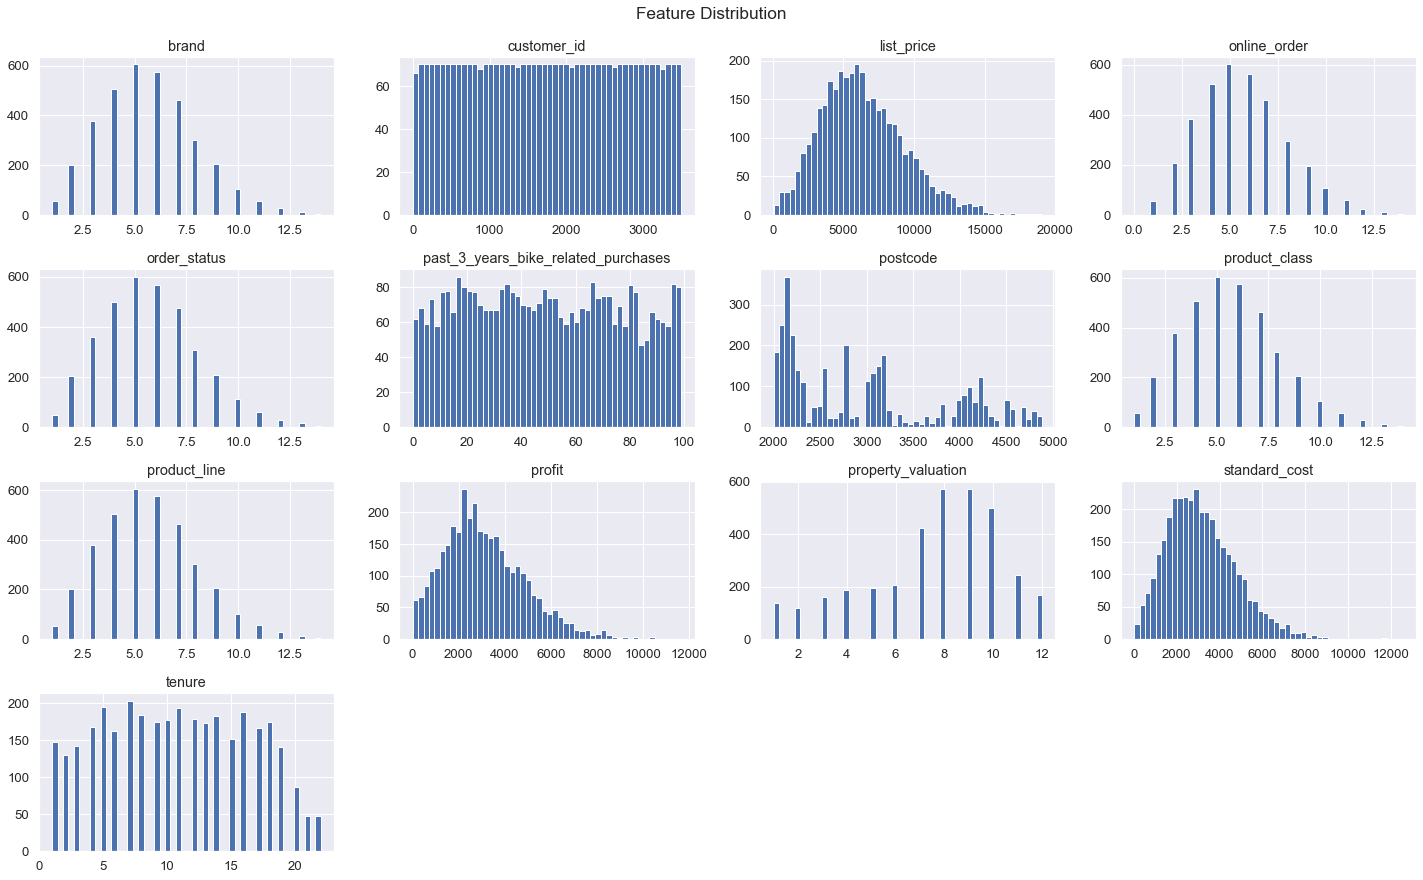

In [50]:
df3.hist(bins=50, figsize=(20,12))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

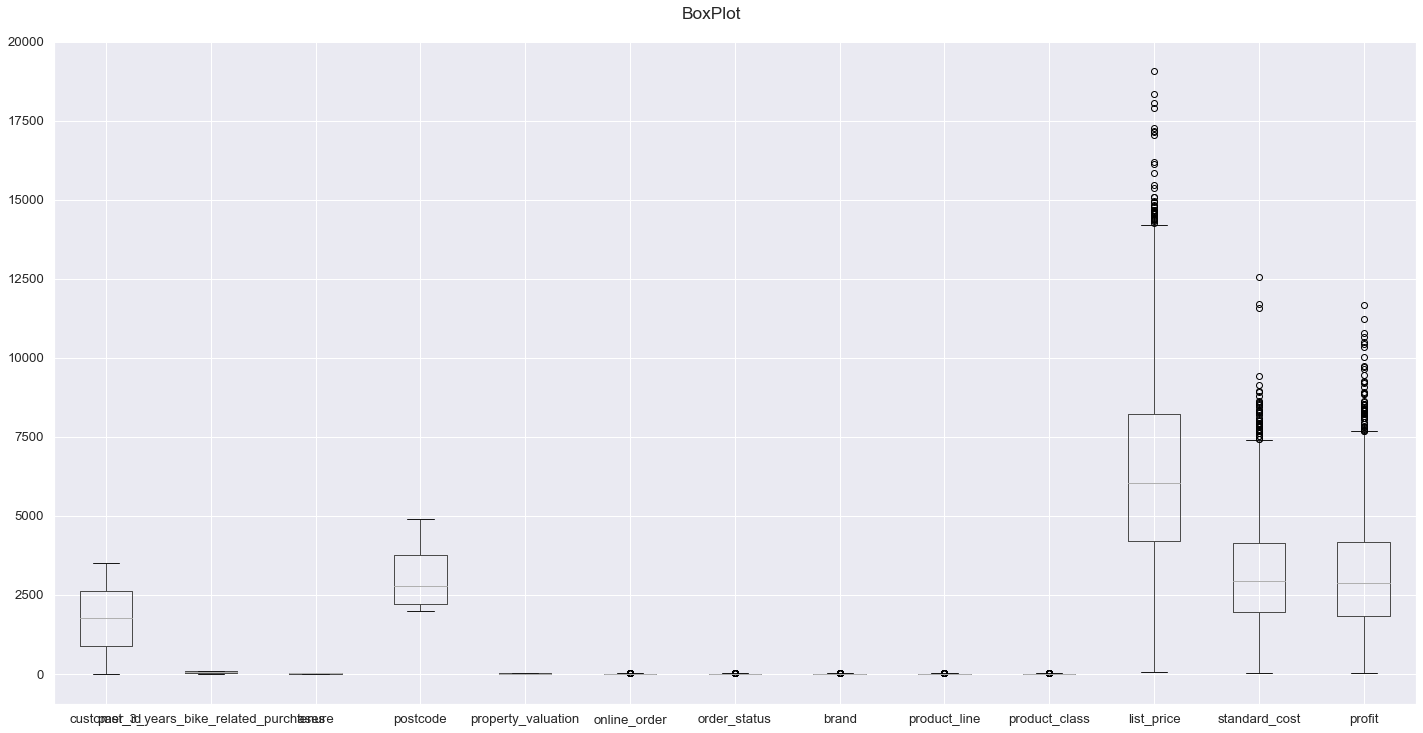

In [51]:
df3.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

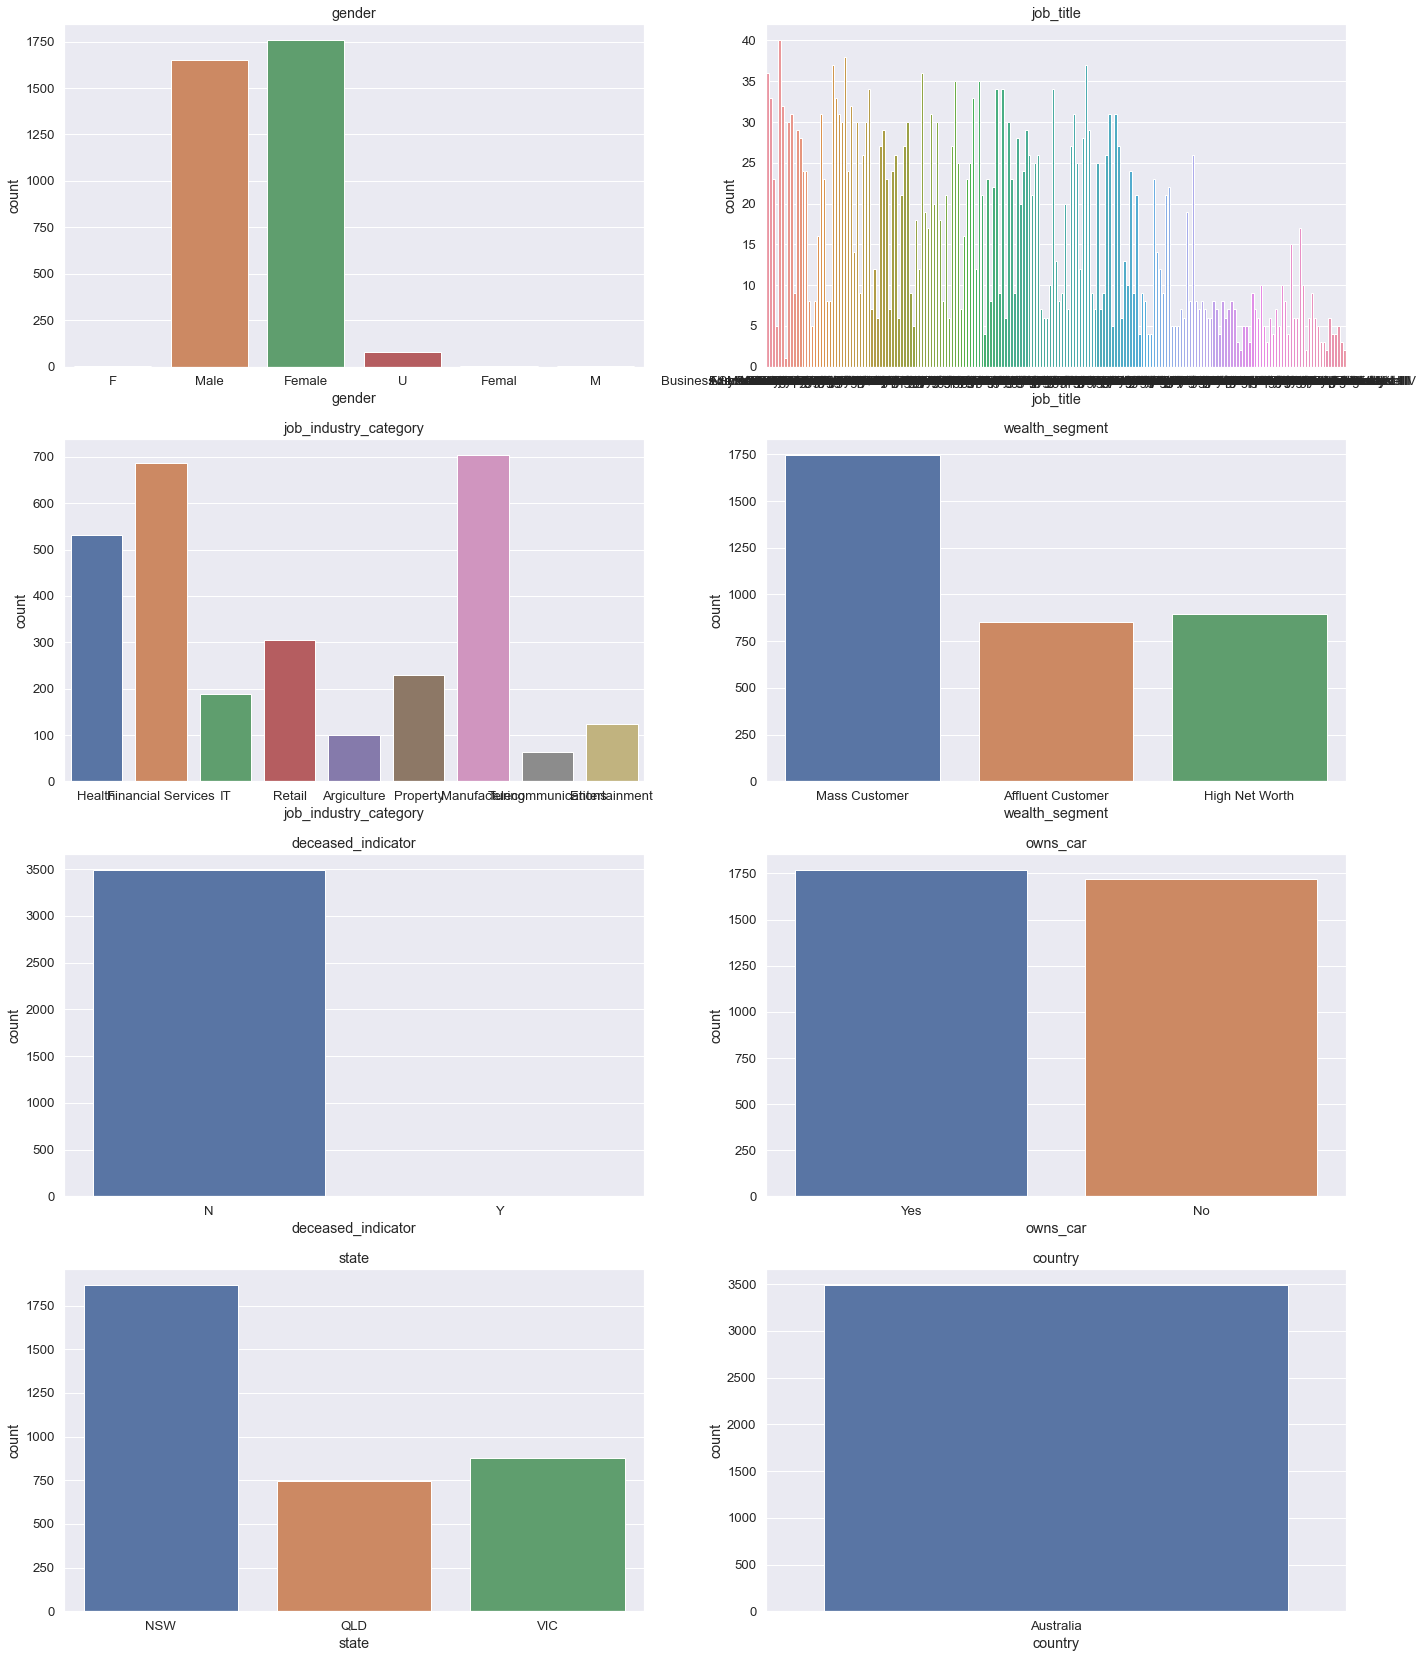

In [52]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("gender")
sns.countplot(df3.gender)

plt.subplot(7,2,2)
plt.title("job_title")
sns.countplot(df3.job_title)

plt.subplot(7,2,3)
plt.title("job_industry_category")
sns.countplot(df3.job_industry_category)

plt.subplot(7,2,4)
plt.title("wealth_segment")
sns.countplot(df3.wealth_segment)

plt.subplot(7,2,5)
plt.title("deceased_indicator")
sns.countplot(df3.deceased_indicator)

plt.subplot(7,2,6)
plt.title("owns_car")
sns.countplot(df3.owns_car)

plt.subplot(7,2,7)
plt.title("state")
sns.countplot(df3.state)

plt.subplot(7,2,8)
plt.title("country")
sns.countplot(df3.country)

plt.tight_layout()
plt.show()

### Drop columns (Match the New Customer Dataset)

In [53]:
df3.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,online_order,order_status,brand,product_line,product_class,list_price,standard_cost,profit
0,1,Laraine,Medendorp,F,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,11,11,11,11,11,9084.45,6066.36,3018.09
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,3,3,3,3,3,4149.07,1922.81,2226.26
2,4,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,2,2,2,2,2,1047.72,827.15,220.57
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,6,6,6,6,6,5903.20,3508.26,2394.94
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,5,5,5,5,5,5931.69,1985.14,3946.55


In [54]:
df3.columns

Index(['customer_id', 'first_name', 'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car', 'tenure', 'address', 'postcode', 'state', 'country', 'property_valuation', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'list_price', 'standard_cost', 'profit'], dtype='object')

In [64]:
df3.drop(['customer_id', 'default', 'online_order','order_status', 'brand', 'product_line', 'product_class', 'list_price', 'standard_cost','profit'],axis=1,inplace=True)

In [65]:
df3.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,Laraine,Medendorp,F,93,1953-12-10,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,Talbot,NaN,Male,33,1961-03-10,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


### Pairplots

<Figure size 1440x1440 with 0 Axes>

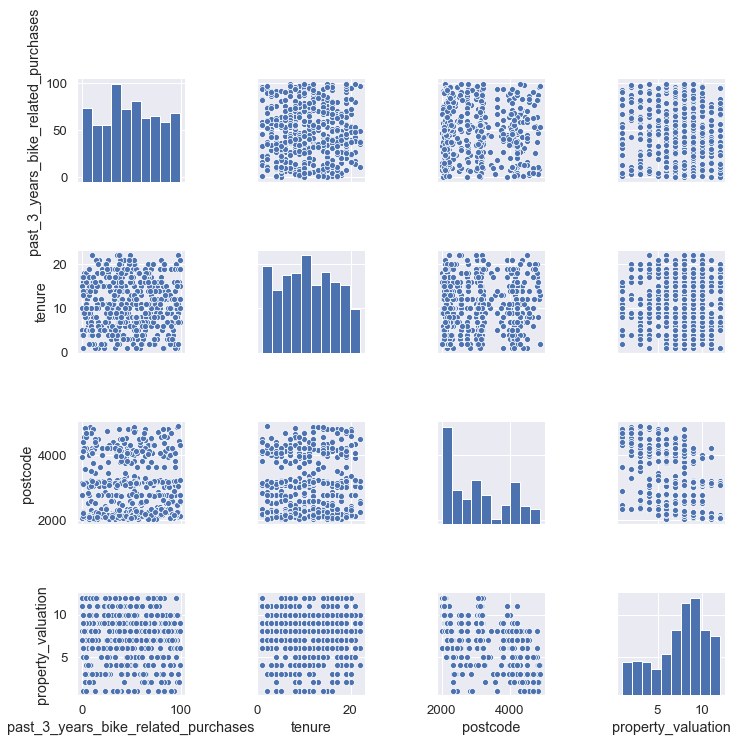

In [66]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df3.sample(500))
plt.show()

### Correlation

In [67]:
df3.corr()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation
past_3_years_bike_related_purchases,1.000000,-0.012906,-0.008798,0.009681
tenure,-0.012906,1.000000,0.003185,-0.014615
postcode,-0.008798,0.003185,1.000000,-0.518476
property_valuation,0.009681,-0.014615,-0.518476,1.000000


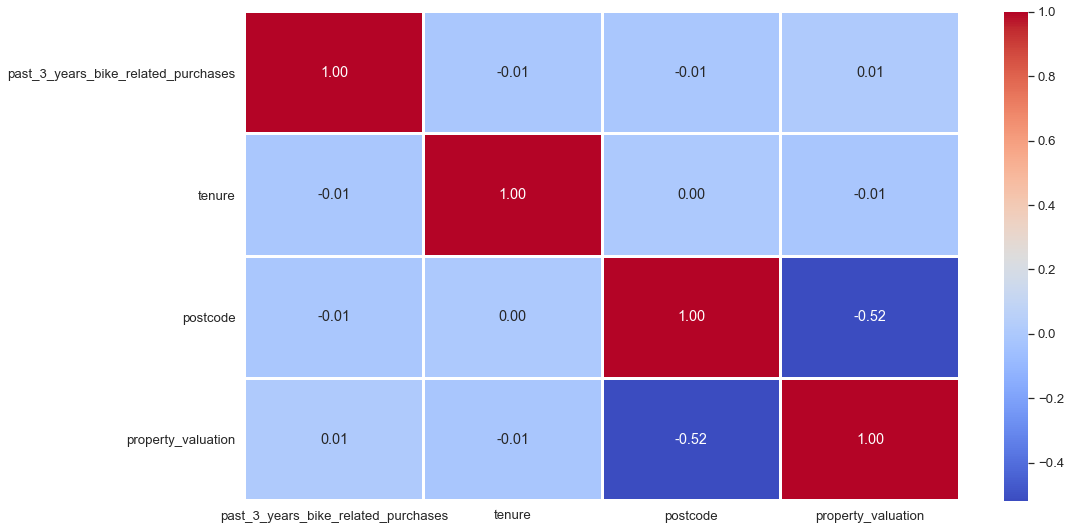

In [68]:
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [69]:
df3.isnull().sum()

first_name                               0
last_name                              112
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     76
job_title                              421
job_industry_category                  560
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  76
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

### Treat Duplicate Values

In [61]:
df.duplicated(keep='first').sum()

0

### Create new pivot table

In [62]:
#df_pivot = pd.pivot_table(data=df3, values="profit", index="customer_id",aggfunc='sum')

In [63]:
#df_pivot